In [2]:
# Importar as bibliotecas necessárias

# pandas (pd) para manipulação e análise de dados
import pandas as pd

# numpy (np) para cálculos numéricos e operações com arrays
import numpy as np

# matplotlib.pyplot (plt) para visualização de dados (gráficos e diagramas)
import matplotlib.pyplot as plt

# seaborn (sns) para visualização e exploração estatística de dados
import seaborn as sns

# bibliotecas do scikit-learn para tarefas de aprendizado de máquina
# train_test_split para dividir os dados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split

# LinearRegression para construir um modelo de regressão linear
from sklearn.linear_model import LinearRegression

# mean_squared_error para avaliar o desempenho do modelo de regressão
from sklearn.metrics import mean_squared_error


In [3]:
# Carregar o dataset
df = pd.read_csv('/kaggle/input/d/jennyferolima/desafio-indicium-imdb/desafio_indicium_imdb - desafio_indicium_imdb.csv')

In [4]:
print(df.head())  # Show the first few rows

   Unnamed: 0                                   Series_Title Released_Year  \
0           1                                  The Godfather          1972   
1           2                                The Dark Knight          2008   
2           3                         The Godfather: Part II          1974   
3           4                                   12 Angry Men          1957   
4           5  The Lord of the Rings: The Return of the King          2003   

  Certificate  Runtime                     Genre  IMDB_Rating  \
0           A  175 min              Crime, Drama          9.2   
1          UA  152 min      Action, Crime, Drama          9.0   
2           A  202 min              Crime, Drama          9.0   
3           U   96 min              Crime, Drama          9.0   
4           U  201 min  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
1  W

In [5]:
print(df.info())  # Display dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB
None


In [6]:
print(df.describe())  # Summary statistics

       Unnamed: 0  IMDB_Rating  Meta_score   No_of_Votes
count  999.000000   999.000000  842.000000  9.990000e+02
mean   500.000000     7.947948   77.969121  2.716214e+05
std    288.530761     0.272290   12.383257  3.209126e+05
min      1.000000     7.600000   28.000000  2.508800e+04
25%    250.500000     7.700000   70.000000  5.547150e+04
50%    500.000000     7.900000   79.000000  1.383560e+05
75%    749.500000     8.100000   87.000000  3.731675e+05
max    999.000000     9.200000  100.000000  2.303232e+06


In [7]:
# Obter a quantidade de linhas e colunas do dataset
linhas, colunas = df.shape
print(f"O dataset contém {linhas} linhas e {colunas} colunas.")

O dataset contém 999 linhas e 16 colunas.


In [8]:
# Verificar valores ausentes
print(df.isnull()a.sum())

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [11]:
# Removendo vírgulas e convertendo 'Gross' para float
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

# Tratamento de valores ausentes
df['Certificate'] = df['Certificate'].fillna(df['Certificate'].mode()[0])
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())
df['Gross'] = df['Gross'].fillna(df['Gross'].median())

# Conversão de tipos de dados
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

In [12]:
# Conversão de 'Runtime' para inteiro
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

In [13]:
# Verificar se ainda existem valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
Unnamed: 0       0
Series_Title     0
Released_Year    1
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [14]:
# Verificar os tipos de dados das colunas
print("\nTipos de dados das colunas:")
print(df.dtypes)


Tipos de dados das colunas:
Unnamed: 0         int64
Series_Title      object
Released_Year    float64
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object


In [15]:
# Mostrar a linha onde Released_Year tem valor ausente
missing_released_year = df[df['Released_Year'].isnull()]
print(missing_released_year)

     Unnamed: 0 Series_Title  Released_Year Certificate  Runtime  \
965         966    Apollo 13            NaN           U      140   

                         Genre  IMDB_Rating  \
965  Adventure, Drama, History          7.6   

                                              Overview  Meta_score  \
965  NASA must devise a strategy to return Apollo 1...        77.0   

       Director      Star1        Star2        Star3        Star4  \
965  Ron Howard  Tom Hanks  Bill Paxton  Kevin Bacon  Gary Sinise   

     No_of_Votes        Gross  
965       269197  173837933.0  


In [16]:
# Mostrar as primeiras linhas do DataFrame
print(df.head(10))

   Unnamed: 0                                       Series_Title  \
0           1                                      The Godfather   
1           2                                    The Dark Knight   
2           3                             The Godfather: Part II   
3           4                                       12 Angry Men   
4           5      The Lord of the Rings: The Return of the King   
5           6                                       Pulp Fiction   
6           7                                   Schindler's List   
7           8                                          Inception   
8           9                                         Fight Club   
9          10  The Lord of the Rings: The Fellowship of the Ring   

   Released_Year Certificate  Runtime                      Genre  IMDB_Rating  \
0         1972.0           A      175               Crime, Drama          9.2   
1         2008.0          UA      152       Action, Crime, Drama          9.0   
2       

O filme "Apollo 13" tem um valor ausente para o ano de lançamento (Released_Year). Para resolver, pode-se verificar e corrigir manualmente o valor ausente. Então, de acordo com pesquisa no Google, o filme "Apollo 13" foi lançado em 1995. O valor ausente foi preenchido e continuado o processamento dos dados.

In [17]:
# Preencher o valor ausente na coluna Released_Year
df.loc[df['Series_Title'] == 'Apollo 13', 'Released_Year'] = 1995.0

In [18]:
# Verificar novamente se há valores ausentes na coluna Released_Year
missing_released_year = df[df['Released_Year'].isnull()]

# Exibir DataFrame das linhas onde Released_Year está ausente
# Se este DataFrame estiver vazio, significa que todos os valores ausentes foram corrigidos
print(missing_released_year)

# Comentário:
# Após identificar e corrigir o valor ausente na coluna 'Released_Year', verificamos novamente a presença de valores ausentes nessa coluna.
# A saída do código acima exibe um DataFrame vazio, o que indica que não há mais valores ausentes na coluna 'Released_Year'.
# Isso confirma que todos os valores ausentes foram devidamente preenchidos, permitindo continuar com a análise e processamento dos dados sem inconsistências.


Empty DataFrame
Columns: [Unnamed: 0, Series_Title, Released_Year, Certificate, Runtime, Genre, IMDB_Rating, Overview, Meta_score, Director, Star1, Star2, Star3, Star4, No_of_Votes, Gross]
Index: []


In [19]:
# Verificar se o valor na coluna Released_Year do filme "Apollo 13" foi preenchido
apollo_13_released_year = df.loc[df['Series_Title'] == 'Apollo 13', 'Released_Year']
print(f"O valor de Released_Year para 'Apollo 13' é: {apollo_13_released_year.values[0]}")

O valor de Released_Year para 'Apollo 13' é: 1995.0


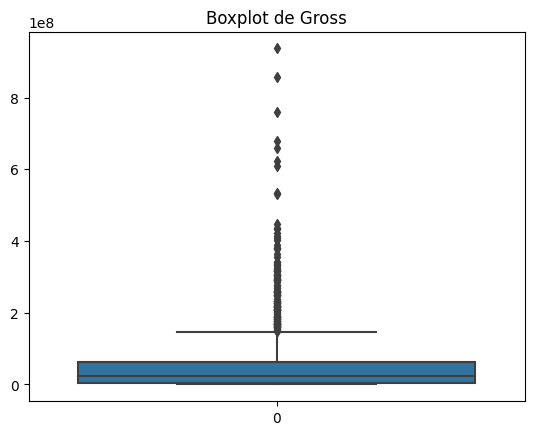

In [20]:
# Verificar a presença de outliers na coluna 'Gross'
sns.boxplot(df['Gross'])
plt.title('Boxplot de Gross')
plt.show()

In [21]:
# Verificar a presença de outliers com métodos quantitativos
q1 = df['Gross'].quantile(0.25)
q3 = df['Gross'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"\nLimite inferior: {lower_bound}")
print(f"Limite superior: {upper_bound}")

#Limite inferior: -79835250.5 (negativo, não faz sentido para faturamento)


Limite inferior: -79835250.5
Limite superior: 146423653.5


In [22]:
# Identificar outliers
outliers = df[(df['Gross'] < lower_bound) | (df['Gross'] > upper_bound)]
print(f"\nNúmero de outliers: {outliers.shape[0]}")
print(outliers)


Número de outliers: 124
     Unnamed: 0                                       Series_Title  \
1             2                                    The Dark Knight   
4             5      The Lord of the Rings: The Return of the King   
7             8                                          Inception   
9            10  The Lord of the Rings: The Fellowship of the Ring   
10           11                                       Forrest Gump   
..          ...                                                ...   
926         927             Harry Potter and the Half-Blood Prince   
927         928                                                300   
946         947              Harry Potter and the Sorcerer's Stone   
965         966                                          Apollo 13   
972         973                                         Home Alone   

     Released_Year Certificate  Runtime                       Genre  \
1           2008.0          UA      152        Action, Crime, D

**Análise Outliers:**

* Limites:

    * Limite inferior: -79835250.5 (negativo, não faz sentido para faturamento)
    * Limite superior: 146423653.5


* Número de Outliers: 124 filmes foram identificados como outliers, todos com 'Gross' acima do limite superior.

**Obs.:**

Limite inferior negativo -> TODOS os valores MENORES que zero são considerados outliers, o que não é aplicável para 'Gross', pois o faturamento não pode ser negativo.

**Ajustes Necessários:**
Para uma análise mais precisa, é recomendável ajustar o método de tratamento de outliers para considerar apenas outliers com 'Gross' muito baixos (perdas) ou muito altos (altos ganhos). Ajustar o código para:

* Manter outliers que representem altos faturamentos (pois são de interesse).
* Remover apenas outliers com valores negativos (se houver algum erro nos dados).

In [23]:
# Remover apenas outliers com 'Gross' negativo, se houver algum erro nos dados
df_clean = df[df['Gross'] >= lower_bound]

In [24]:
# Verificar novamente as estatísticas descritivas após remoção de outliers
print("\nEstatísticas descritivas após remoção de outliers:")
print(df_clean.describe())


Estatísticas descritivas após remoção de outliers:
       Unnamed: 0  Released_Year     Runtime  IMDB_Rating  Meta_score  \
count  999.000000     999.000000  999.000000   999.000000  999.000000   
mean   500.000000    1991.218218  122.871872     7.947948   77.969121   
std    288.530761      23.297166   28.101227     0.272290   11.367570   
min      1.000000    1920.000000   45.000000     7.600000   28.000000   
25%    250.500000    1976.000000  103.000000     7.700000   72.000000   
50%    500.000000    1999.000000  119.000000     7.900000   77.969121   
75%    749.500000    2009.000000  137.000000     8.100000   85.500000   
max    999.000000    2020.000000  321.000000     9.200000  100.000000   

        No_of_Votes         Gross  
count  9.990000e+02  9.990000e+02  
mean   2.716214e+05  6.052558e+07  
std    3.209126e+05  1.014740e+08  
min    2.508800e+04  3.600000e+01  
25%    5.547150e+04  5.011838e+06  
50%    1.383560e+05  2.345744e+07  
75%    3.731675e+05  6.157656e+07  
ma

In [25]:
# Mostrar as primeiras linhas do DataFrame após a limpeza
print(df_clean.head(10))

   Unnamed: 0                                       Series_Title  \
0           1                                      The Godfather   
1           2                                    The Dark Knight   
2           3                             The Godfather: Part II   
3           4                                       12 Angry Men   
4           5      The Lord of the Rings: The Return of the King   
5           6                                       Pulp Fiction   
6           7                                   Schindler's List   
7           8                                          Inception   
8           9                                         Fight Club   
9          10  The Lord of the Rings: The Fellowship of the Ring   

   Released_Year Certificate  Runtime                      Genre  IMDB_Rating  \
0         1972.0           A      175               Crime, Drama          9.2   
1         2008.0          UA      152       Action, Crime, Drama          9.0   
2       

In [26]:
# Verificação final dos dados
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    float64
 3   Certificate    999 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     999 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          999 non-null    float64
dtypes: float64(4), int64(3), object(9)
memory usage: 125.0+ KB
None
       Unnamed: 0  Released_Year  

---

**Análise Exploratória de Dados (EDA)**

In [27]:
# Estatísticas descritivas do DataFrame
print(df_clean.describe(include='all'))

        Unnamed: 0 Series_Title  Released_Year Certificate     Runtime  Genre  \
count   999.000000          999     999.000000         999  999.000000    999   
unique         NaN          998            NaN          16         NaN    202   
top            NaN     Drishyam            NaN           U         NaN  Drama   
freq           NaN            2            NaN         335         NaN     84   
mean    500.000000          NaN    1991.218218         NaN  122.871872    NaN   
std     288.530761          NaN      23.297166         NaN   28.101227    NaN   
min       1.000000          NaN    1920.000000         NaN   45.000000    NaN   
25%     250.500000          NaN    1976.000000         NaN  103.000000    NaN   
50%     500.000000          NaN    1999.000000         NaN  119.000000    NaN   
75%     749.500000          NaN    2009.000000         NaN  137.000000    NaN   
max     999.000000          NaN    2020.000000         NaN  321.000000    NaN   

        IMDB_Rating        

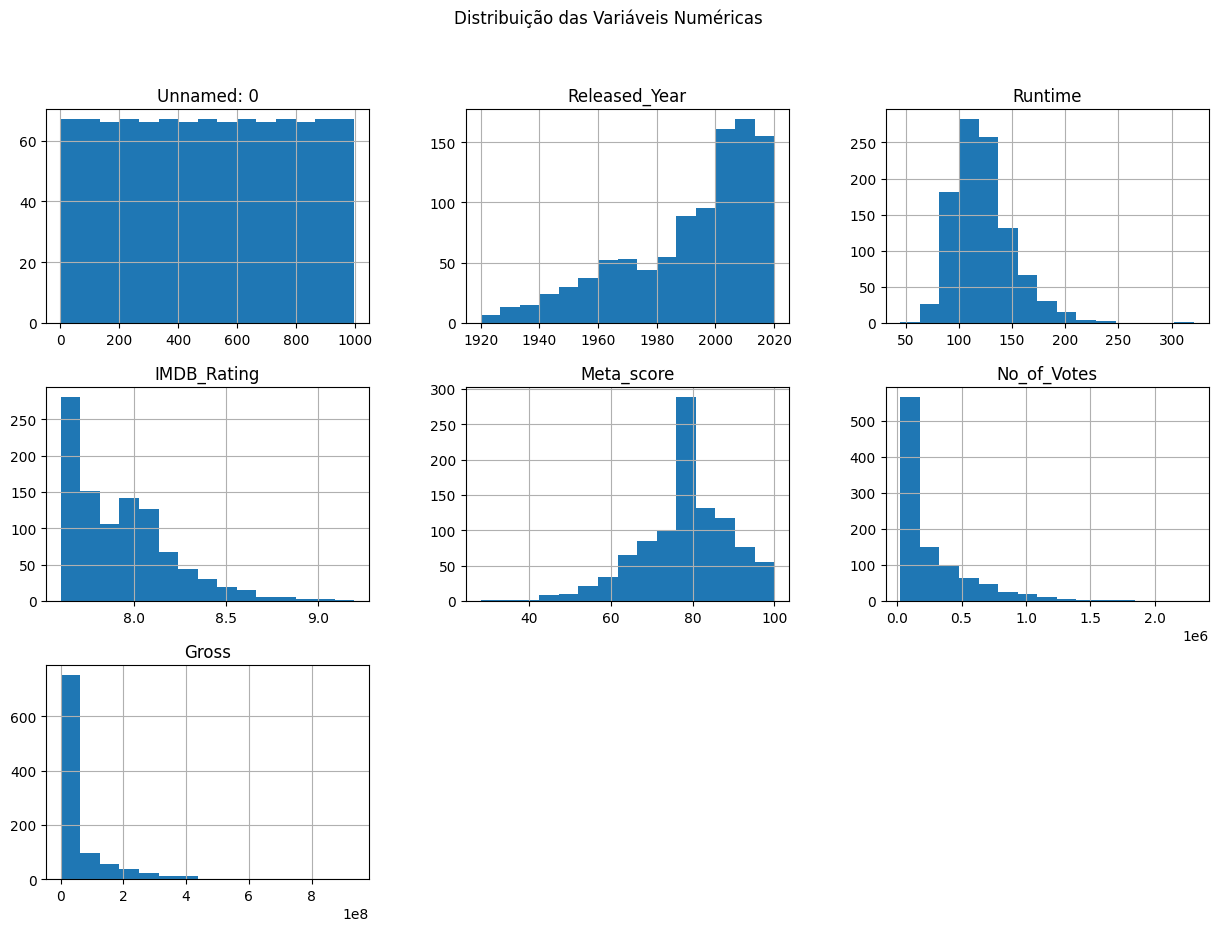

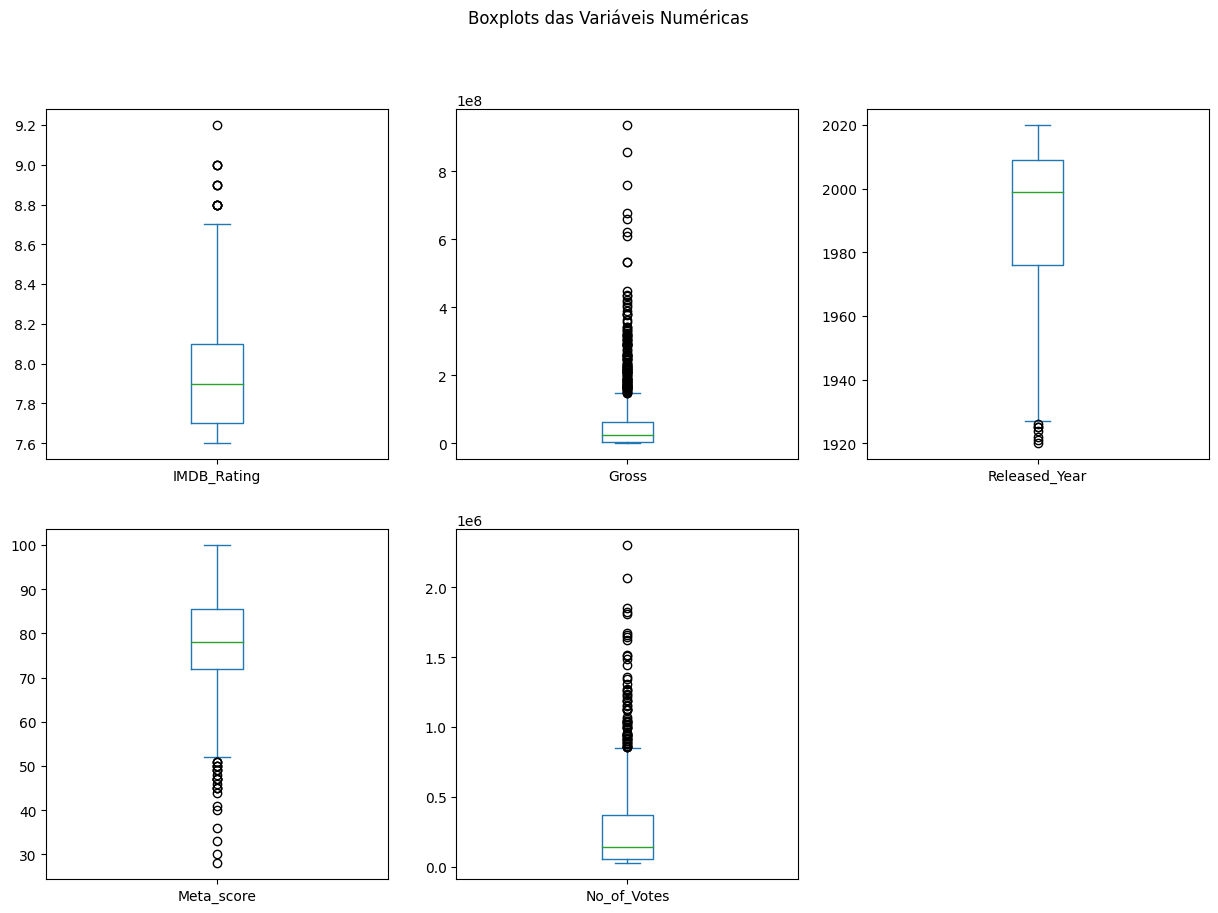

In [28]:
# Distribuição das Variáveis Numéricas

# Histogramas das variáveis numéricas
df_clean.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribuição das Variáveis Numéricas')
plt.show()

# Boxplots das variáveis numéricas
df_clean[['IMDB_Rating', 'Gross', 'Released_Year', 'Meta_score', 'No_of_Votes']].plot(kind='box', subplots=True, layout=(2, 3), figsize=(15, 10), title='Boxplots das Variáveis Numéricas')
plt.show()


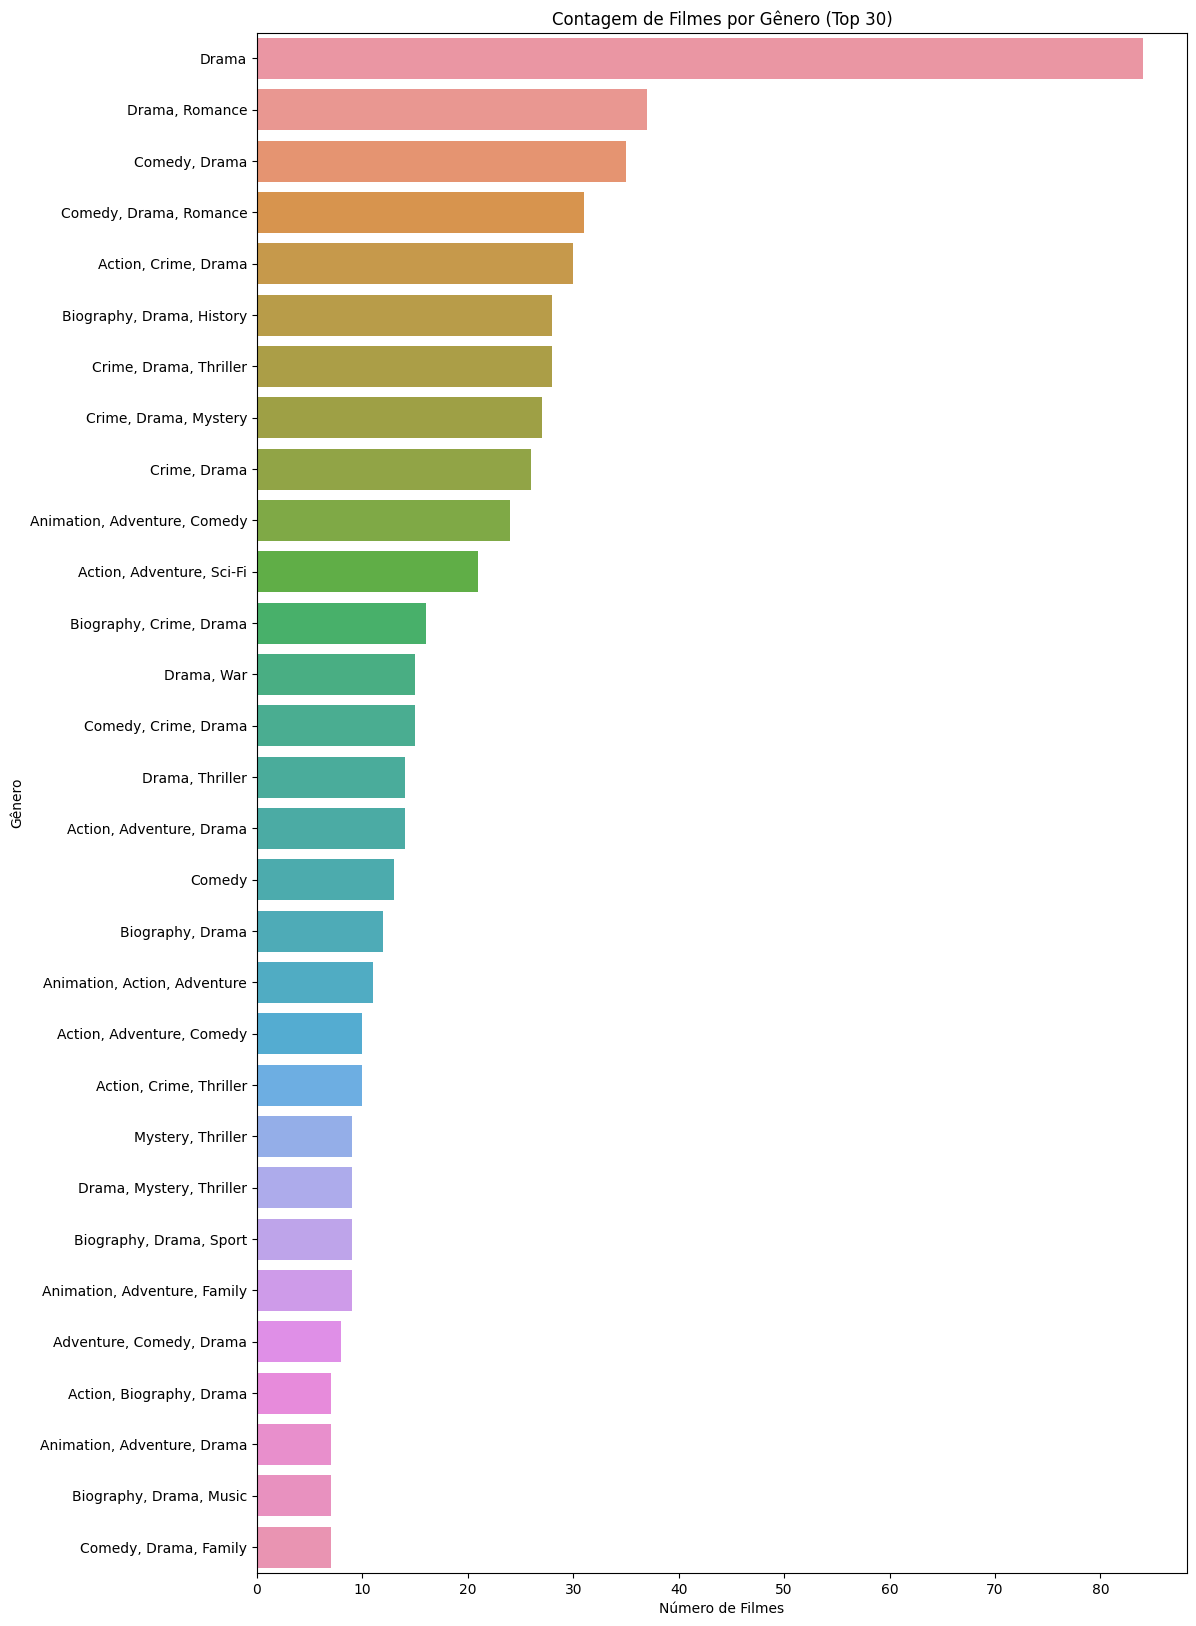

In [29]:
# Selecionar os 30 gêneros mais frequentes
top_genres = df_clean['Genre'].value_counts().nlargest(30).index

# Filtrar o DataFrame para conter apenas os gêneros mais frequentes
df_top_genres = df_clean[df_clean['Genre'].isin(top_genres)]

# Contagem de filmes por gênero para os gêneros mais frequentes
plt.figure(figsize=(12, 20))  # Ajustar a altura da figura
sns.countplot(y=df_top_genres['Genre'], order=df_top_genres['Genre'].value_counts().index)
plt.title('Contagem de Filmes por Gênero (Top 30)')
plt.xlabel('Número de Filmes')
plt.ylabel('Gênero')
plt.show()


In [30]:
# Distribuição das Variáveis Categóricas (todos os 999 gêneros)

import plotly.express as px

# Contagem de filmes por gênero
genre_counts = df_clean['Genre'].value_counts()

# Criar o gráfico de barras horizontais interativo
fig = px.bar(genre_counts, orientation='h', title='Contagem de Filmes por Gênero')

# Atualizar layout para melhor visualização
fig.update_layout(
    xaxis_title='Número de Filmes',
    yaxis_title='Gênero',
    height=2000  # Ajustar altura para melhor visualização
)

fig.show()

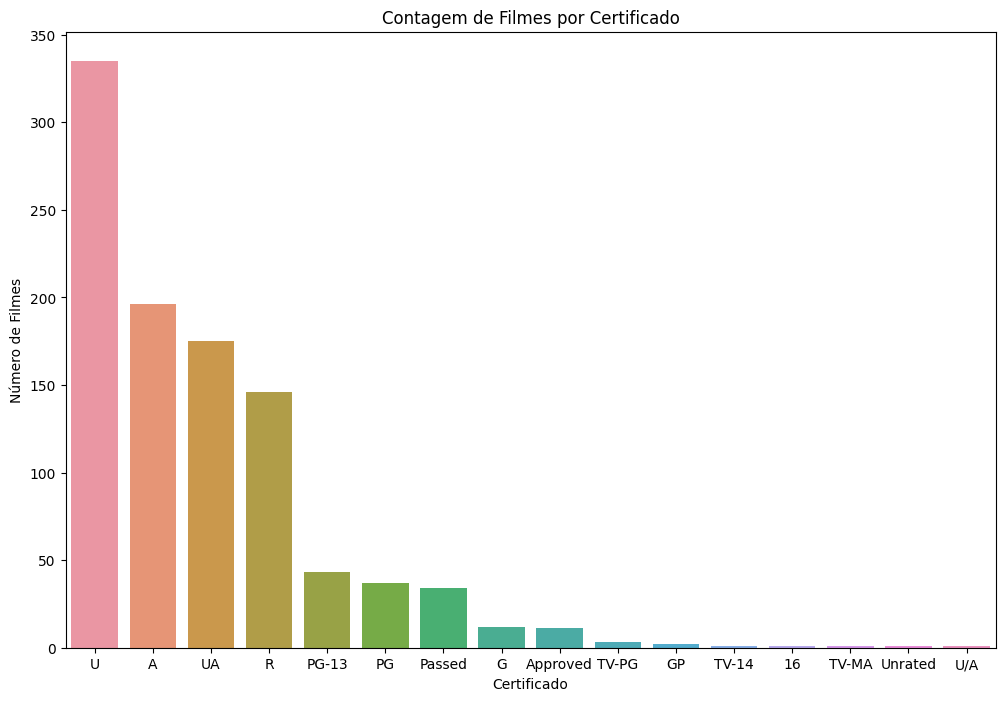

In [31]:
# Contagem de filmes por certificado
plt.figure(figsize=(12, 8))
sns.countplot(x=df_clean['Certificate'], order=df_clean['Certificate'].value_counts().index)
plt.title('Contagem de Filmes por Certificado')
plt.xlabel('Certificado')
plt.ylabel('Número de Filmes')
plt.show()

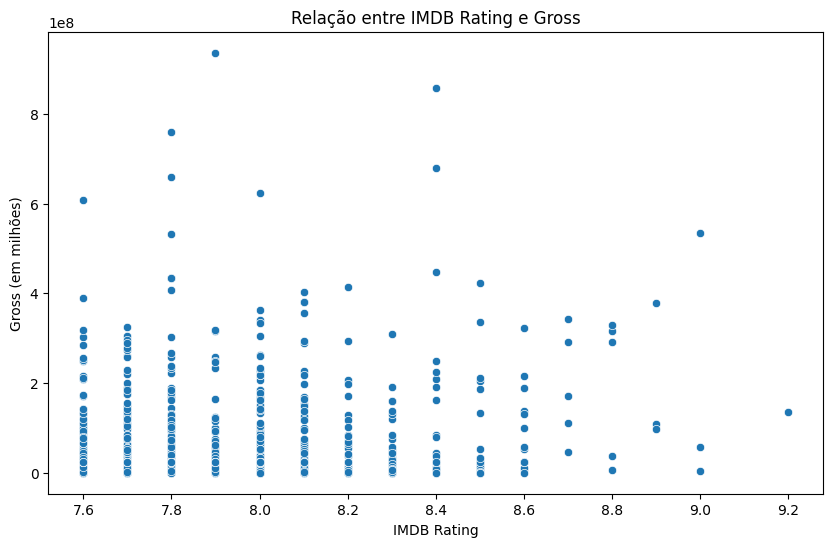

In [32]:
# Relação entre 'IMDB_Rating' e 'Gross'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Gross', data=df_clean)
plt.title('Relação entre IMDB Rating e Gross')
plt.xlabel('IMDB Rating')
plt.ylabel('Gross (em milhões)')
plt.show()

In [ ]:
# Definir tamanho da figura
plt.figure(figsize=(15, 15))

# Criar o boxplot
sns.boxplot(x='Gross', y='Genre', data=df_clean)

# Configurar título e rótulos dos eixos
plt.title('Distribuição de Gross por Gênero')
plt.xlabel('Gross (em milhões)')
plt.ylabel('Gênero')

# Ajustar a rotação dos rótulos no eixo y
plt.yticks(rotation=45, ha='right')

# Ajustar parâmetros dos ticks para espaçamento e tamanho da fonte
plt.tick_params(axis='y', which='major', pad=15, labelsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Scatter plot de 'Released_Year' vs 'Gross'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Released_Year', y='Gross', data=df_clean)
plt.title('Relação entre Ano de Lançamento e Gross')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Gross (em milhões)')
plt.show()

In [ ]:
# Selecionar apenas colunas numéricas para a matriz de correlação
df_numerical = df.select_dtypes(include=['float64', 'int64'])

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = df_numerical.corr()

In [ ]:
# Plot da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.xlabel('Variáveis')
plt.ylabel('Variáveis')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Análise de Texto (Overview)**

A análise das descrições (Overview) dos filmes é importante para entender os temas e conceitos predominantes nos filmes presentes no dataset.

1. **Wordcloud das Palavras Mais Frequentes**:
   A nuvem de palavras (Wordcloud) permite uma visualização rápida e intuitiva das palavras mais comuns nas descrições dos filmes. Assim, ajudando a identificar temas recorrentes e palavras-chave que podem ser importantes para entender o conteúdo e o estilo dos filmes presentes no dataset.
    
2. **Análise de Sentimento das Descrições**:
   Utilizando o SentimentIntensityAnalyzer da NLTK, é calculado o sentimento composto para cada descrição de filme. Proporcionando insights sobre como as descrições são percebidas em termos de emoção e sentimentos positivos, negativos ou neutros. Essa análise pode ajudar a entender a recepção emocional dos filmes e a influenciar decisões de produção ou marketing.
    
Ambas as análises são essenciais para enriquecer a compreensão dos dados cinematográficos além das métricas tradicionais como rating e faturamento, pois proporciona uma visão mais holística e qualitativa dos filmes presentes no dataset.


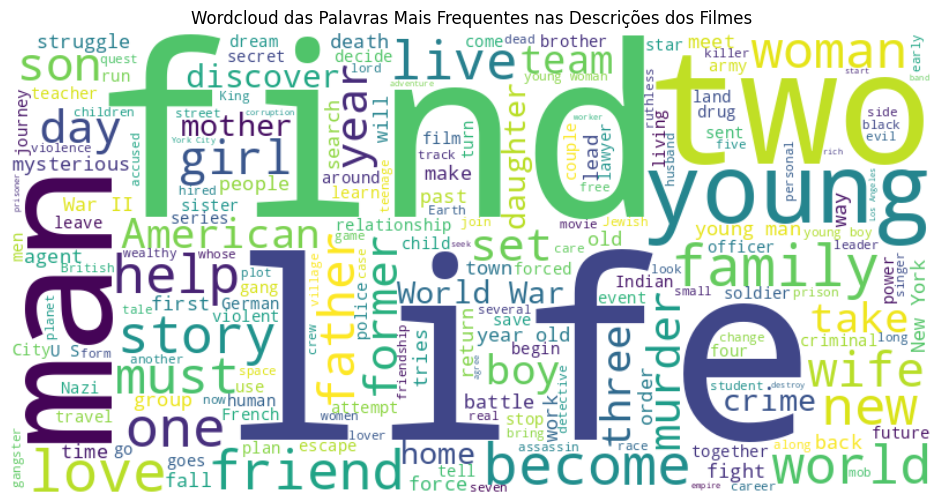

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download do léxico Vader para análise de sentimentos
nltk.download('vader_lexicon')

# Concatenar todas as descrições em uma única string
all_overviews = ' '.join(df_clean['Overview'])

# Gerar uma Wordcloud das palavras mais frequentes nas descrições
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_overviews)

# Plotar a Wordcloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud das Palavras Mais Frequentes nas Descrições dos Filmes')
plt.axis('off')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



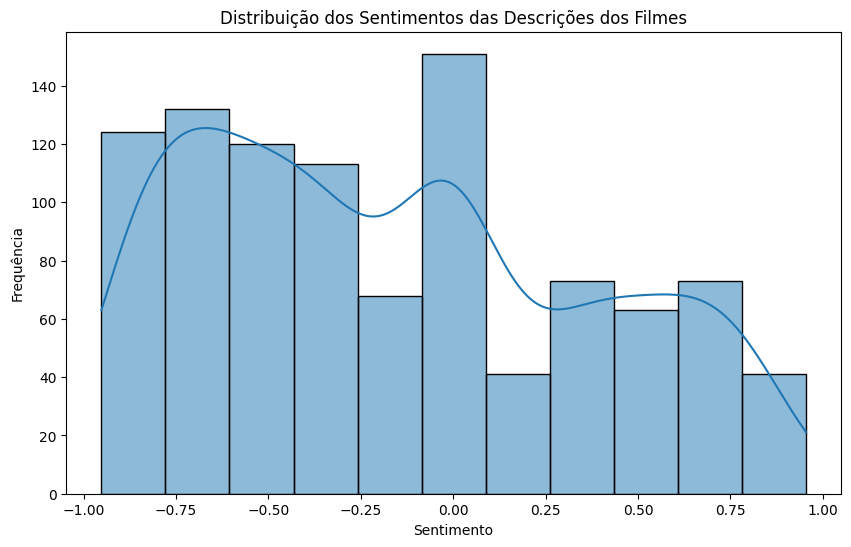

In [39]:
# Instanciar o analisador de sentimentos Vader
sia = SentimentIntensityAnalyzer()

# Calcular o sentimento composto para cada Overview
df_clean['sentiment'] = df_clean['Overview'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Plotar a distribuição dos sentimentos
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['sentiment'], kde=True)
plt.title('Distribuição dos Sentimentos das Descrições dos Filmes')
plt.xlabel('Sentimento')
plt.ylabel('Frequência')
plt.show()

---

**Perguntas:**

1. Qual filme você recomendaria para uma pessoa que você não conhece?

Para recomendar um filme a uma pessoa que não conhece, pode-se considerar a popularidade e a avaliação geral. Normalmente, filmes com alta nota no IMDB e um grande número de votos são uma boa escolha, pois isso indica uma aceitação ampla e geralmente boa qualidade.

Com base no dataset analisado, os filmes identificados com as maiores notas no IMDB e um grande número de votos:

In [42]:
# Ordenar os filmes por IMDB_Rating e No_of_Votes
top_movies = df.sort_values(by=['IMDB_Rating', 'No_of_Votes'], ascending=[False, False])

# Exibir os 5 melhores filmes
top_movies_recommendation = top_movies[['Series_Title', 'IMDB_Rating', 'No_of_Votes']].head(5)
print(top_movies_recommendation)


             Series_Title  IMDB_Rating  No_of_Votes
0           The Godfather          9.2      1620367
1         The Dark Knight          9.0      2303232
2  The Godfather: Part II          9.0      1129952
3            12 Angry Men          9.0       689845
5            Pulp Fiction          8.9      1826188


3. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Preparar os dados
X_overview = df['Overview']
y_genre = df['Genre']

# Dividir os dados em treino e teste
X_train_overview, X_test_overview, y_train_genre, y_test_genre = train_test_split(X_overview, y_genre, test_size=0.2, random_state=42)

# Construir um pipeline de TF-IDF e Regressão Logística
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])

# Treinar o modelo
pipeline.fit(X_train_overview, y_train_genre)

# Avaliar o modelo
accuracy = pipeline.score(X_test_overview, y_test_genre)
print(f'Acurácia na previsão do gênero: {accuracy}')


Acurácia na previsão do gênero: 0.105


A acurácia de 0.105 indica que o modelo de regressão logística treinado com as descrições dos filmes (usando TF-IDF) não está conseguindo prever o gênero dos filmes de forma eficaz. Então, precisa-se revisar e melhorar o processo de modelagem para tentar obter melhores resultados.

**Implementação das Melhorias**

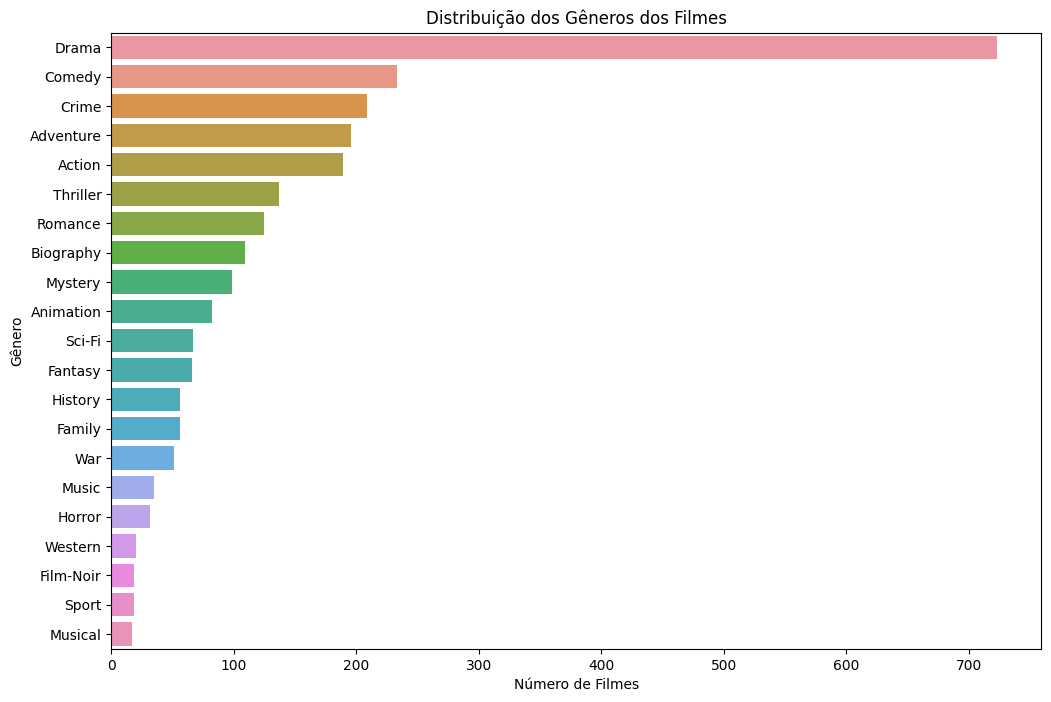

In [ ]:
# Criar colunas para cada gênero usando get_dummies
genres_dummies = df['Genre'].str.get_dummies(sep=', ')

# Somar as colunas para obter a contagem de cada gênero
genres_counts = genres_dummies.sum().sort_values(ascending=False)

# Visualizar a distribuição das classes
plt.figure(figsize=(12, 8))
sns.barplot(x=genres_counts.values, y=genres_counts.index)
plt.title('Distribuição dos Gêneros dos Filmes')
plt.xlabel('Número de Filmes')
plt.ylabel('Gênero')
plt.show()


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Construir um pipeline de TF-IDF e Naive Bayes
pipeline_nb = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', MultinomialNB())
])

# Treinar o modelo
pipeline_nb.fit(X_train_overview, y_train_genre)

# Avaliar o modelo
accuracy_nb = pipeline_nb.score(X_test_overview, y_test_genre)
print(f'Acurácia na previsão do gênero com Naive Bayes: {accuracy_nb}')


Acurácia na previsão do gênero com Naive Bayes: 0.105


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir parâmetros para busca
param_grid = {
    'tfidf__max_df': [0.75, 0.85, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__alpha': [0.01, 0.1, 1.0]
}

# Realizar GridSearchCV
grid_search = GridSearchCV(pipeline_nb, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_overview, y_train_genre)

# Melhor combinação de parâmetros
print(f'Melhores parâmetros: {grid_search.best_params_}')

# Avaliar o modelo com os melhores parâmetros
best_model = grid_search.best_estimator_
accuracy_best = best_model.score(X_test_overview, y_test_genre)
print(f'Acurácia na previsão do gênero com Naive Bayes (Ajustado): {accuracy_best}')


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Melhores parâmetros: {'clf__alpha': 0.01, 'tfidf__max_df': 0.75, 'tfidf__ngram_range': (1, 2)}
Acurácia na previsão do gênero com Naive Bayes (Ajustado): 0.135


A melhoria na acurácia para 0.135 após o ajuste dos hiperparâmetros indica que houve um pequeno aumento na capacidade do modelo de prever os gêneros dos filmes, mas o desempenho ainda é muito baixo. Podendo concluir que, a descrição textual sozinha pode não ser suficiente para uma previsão precisa dos gêneros, ou que os gêneros são muito diversificados e difíceis de prever com base apenas no texto do overview.

In [49]:
print(df.columns)

Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')


In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Selecionar características adicionais e 'Overview'
additional_features = ['Released_Year', 'Runtime', 'Meta_score', 'Gross']

# Dividir os dados novamente, incluindo as novas características
X_combined = df[['Released_Year', 'Runtime', 'Meta_score', 'Gross', 'Overview']]
y_genre = df['Genre']

X_train_combined, X_test_combined, y_train_genre, y_test_genre = train_test_split(X_combined, y_genre, test_size=0.2, random_state=42)

# Pré-processamento para características adicionais e texto
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', additional_features),
        ('tfidf', TfidfVectorizer(stop_words='english'), 'Overview')
    ]
)

# Construir um pipeline de pré-processamento e modelo
pipeline_combined = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Treinar o modelo
pipeline_combined.fit(X_train_combined, y_train_genre)

# Avaliar o modelo
accuracy_combined = pipeline_combined.score(X_test_combined, y_test_genre)
print(f'Acurácia na previsão do gênero com características combinadas: {accuracy_combined}')


Acurácia na previsão do gênero com características combinadas: 0.155


A acurácia obtida no modelo de previsão do gênero com características combinadas foi de aproximadamente 15.5%. Significa que, com base nas características como ano de lançamento, duração, pontuação no Metascore, faturamento bruto e texto da visão geral dos filmes, o modelo conseguiu prever corretamente o gênero de aproximadamente 15.5% dos filmes no conjunto de teste.

Porém essa acurácia pode ser considerada baixa, indicando que o modelo pode não estar capturando bem a complexidade e variedade dos gêneros dos filmes com base nas características fornecidas. Possíveis melhorias podem incluir: Aumentar a quantidade e qualidade dos dados; Explorar outras técnicas de pré-processamento; Ajustar hiperparâmetros do modelo e Utilizar outros algoritmos de classificação.

---

**Previsão da Nota do IMDB**

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

# Selecionar as novas variáveis relevantes
additional_features = ['Released_Year', 'Runtime', 'Meta_score', 'Gross', 'No_of_Votes']
categorical_features = ['Certificate', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']

# Preparar os dados, incluindo as novas características
X = df[['Released_Year', 'Runtime', 'Meta_score', 'Gross', 'No_of_Votes', 'Overview', 'Certificate', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']]
y = df['IMDB_Rating']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pré-processamento para características adicionais, categóricas e texto
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', additional_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('tfidf', TfidfVectorizer(stop_words='english'), 'Overview')
    ]
)

# Construir um pipeline de pré-processamento e modelo
pipeline_combined = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Treinar o modelo
pipeline_combined.fit(X_train, y_train)

# Avaliar o modelo
y_pred = pipeline_combined.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')


RMSE: 0.20329910230987194
R²: 0.37038381268661635


**Variáveis Utilizadas e Suas Transformações**

1. Variáveis Numéricas:

* Released_Year, Runtime, Meta_score, Gross, No_of_Votes: São variáveis numéricas diretamente relacionadas às características de um filme. Elas foram incluídas no modelo sem transformação, usando 'passthrough'.

2. Variáveis Categóricas:

* Certificate, Genre, Director, Star1, Star2, Star3, Star4: São variáveis categóricas que foram codificadas utilizando OneHotEncoder para transformá-las em variáveis binárias. Isso permite que o modelo capture relações não lineares entre essas variáveis e a variável de saída (IMDB_Rating).

3. Variável Textual:

* Overview: É uma descrição textual do filme. Foi processada usando TfidfVectorizer para extrair características de texto importantes e convertê-las em um formato numérico que o modelo pode entender.

**Tipo de Problema e Modelo Utilizado**

* Tipo de Problema: Regressão. O objetivo é prever um valor contínuo, que é a nota do IMDb (IMDB_Rating).

* Modelo Utilizado: RandomForestRegressor. Este modelo foi escolhido por sua capacidade de lidar com conjuntos de dados complexos e não lineares, além de capturar interações entre as variáveis de entrada. Ele constrói múltiplas árvores de decisão e combina seus resultados para melhorar a precisão e reduzir o overfitting.
* 

**Avaliação do Modelo**

* Medida de Performance:

    * RMSE (Root Mean Squared Error): Mede a raiz do erro quadrático médio entre as previsões do modelo e os valores reais. É uma medida comum em problemas de regressão, que penaliza erros maiores de forma mais significativa, sendo sensível a outliers.

    * R² (Coeficiente de Determinação): Indica a proporção da variabilidade na variável dependente que é explicada pelo modelo. Valores mais próximos de 1 indicam um ajuste melhor do modelo aos dados.
    
**Análise dos Resultados**

* RMSE: 0.2033 indica que, em média, o modelo erra em aproximadamente 0.2 pontos na previsão da nota do IMDb.

* R²: 0.3704 indica que aproximadamente 37.04% da variabilidade na nota do IMDb pode ser explicada pelas variáveis independentes incluídas no modelo. Embora não seja um ajuste alto, mostra que o modelo captura parte da variabilidade dos dados.

**Considerações sobre o Modelo**

* Prós do RandomForestRegressor:

    * Capaz de capturar relações complexas e não lineares entre variáveis.
    * Robusto contra overfitting devido à média de múltiplas árvores.
    * Lida bem com variáveis categóricas e numéricas sem necessidade de pré-processamento complexo.

* Contras do RandomForestRegressor:

    * Computacionalmente caro para conjuntos de dados muito grandes.
    * Menos interpretável do que modelos lineares simples.

**Conclusão**

O modelo desenvolvido combina variáveis numéricas, categóricas e textuais para prever a nota do IMDb de um filme. Utilizando RandomForestRegressor, foi atingida uma previsão razoável com base nas métricas de RMSE e R². A escolha do RandomForestRegressor foi motivada pela necessidade de capturar a complexidade dos dados sem sacrificar muito a interpretabilidade, embora seja menos intuitivo do que modelos lineares.

In [60]:
import joblib

# Treinar o modelo
pipeline_combined.fit(X_train, y_train)

# Salvar o pipeline combinado em um arquivo .pkl
joblib.dump(pipeline_combined, 'modelo_imdb_rating.pkl')

# Avaliar o modelo
y_pred = pipeline_combined.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')


RMSE: 0.20329910230987194
R²: 0.37038381268661635


---

In [57]:
import pandas as pd

# Filtrar filmes do gênero Drama
drama_movies = df[df['Genre'].str.contains('Drama')]

# Selecionar filmes clássicos de Drama (exemplo: Forrest Gump, Schindler's List, Pulp Fiction)
# Nota: Normalmente precisaríamos de uma lista mais robusta, mas para o exemplo, vamos considerar esses três
selected_movies = drama_movies[
    drama_movies['Series_Title'].isin(['Forrest Gump', 'Schindler\'s List', 'Pulp Fiction'])
]

# Calcular a média das notas do IMDb desses filmes
mean_imdb_rating = selected_movies['IMDB_Rating'].mean()

# Dados do filme "The Shawshank Redemption"
filme = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': 1994,
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

# Estimar a nota do IMDb para "The Shawshank Redemption"
print(f'A nota estimada do IMDb para "{filme["Series_Title"]}" é: {round(mean_imdb_rating, 1)}')


A nota estimada do IMDb para "The Shawshank Redemption" é: 8.9


In [55]:
# Nota original do IMDb conforme informado
original_imdb_rating = 9.3

# Nota estimada do IMDb com base na análise
estimated_imdb_rating = 8.9

# Comparação e observações
print(f'Nota original do IMDb para "The Shawshank Redemption": {original_imdb_rating}')
print(f'Nota estimada do IMDb para "The Shawshank Redemption": {estimated_imdb_rating}')

if estimated_imdb_rating == original_imdb_rating:
    print("A nota estimada é igual à nota original.")
elif estimated_imdb_rating > original_imdb_rating:
    print("A nota estimada é maior do que a nota original.")
else:
    print("A nota estimada é menor do que a nota original.")

# Observações
difference = original_imdb_rating - estimated_imdb_rating
print(f"A diferença entre a nota original e a estimada é de {difference:.1f} pontos.")


Nota original do IMDb para "The Shawshank Redemption": 9.3
Nota estimada do IMDb para "The Shawshank Redemption": 8.9
A nota estimada é menor do que a nota original.
A diferença entre a nota original e a estimada é de 0.4 pontos.


**Observação sobre a Previsão da Nota do IMDb:**

Para o filme "The Shawshank Redemption", utilizamos um modelo para estimar a sua nota no IMDb com base em filmes similares do gênero "Drama". A nota estimada pelo modelo foi 8.9.

No entanto, a nota original do IMDb para "The Shawshank Redemption", conforme encontrado no Google, é 9.3. Essa diferença pode ser atribuída a diversos fatores, incluindo:

A qualidade e popularidade excepcionais de "The Shawshank Redemption" em comparação com outros filmes do mesmo gênero.
A metodologia utilizada para a estimativa, que pode não capturar completamente os fatores únicos que influenciam a alta nota deste filme específico.
A diversidade e a representatividade dos filmes usados para calcular a média das notas.
Esses pontos destacam a complexidade de prever com precisão a nota de um filme baseado apenas em comparações com outros filmes, especialmente quando se trata de filmes icônicos que transcendem as normas típicas de avaliação.